In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
open('CCD.csv','rb').readlines()[:10]

[b'Ticket ID,Ticket Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Lat/Long\r\n',
 b'1000296,05/25/2016 11:15:29 AM +0000,5/1/2016,1:00 PM,Phone,Internet (VOIP),Robocalls,866-410-0458,Autodialed Live Voice Call,,Plantation,FL,33324,"FL 33324\n',
 b'(26.11294, -80.27429)"\r\n',
 b'1000319,05/25/2016 12:51:35 PM +0000,3/7/2016,12:00 PM,Phone,Wired,Telemarketing (including do not call and spoofing),619-840-7262,Live Voice,619-840-7262,San Marcos,CA,92078,"CA 92078\n',
 b'(33.122635, -117.190612)"\r\n',
 b'1000322,05/25/2016 12:56:54 PM +0000,5/24/2016,8:08 PM,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoofing),626-691-9090,Live Voice,626-691-9090,Wyckoff,NJ,7481,"NJ 07481\n',
 b'(40.998076, -74.167269)"\r\n',
 b'1000323,05/25/2016 01:00:22 PM +0000,3/7/2016,,Phone,Wired,Telemarketing (including do not call and spoofing),877-218-8361,Abandoned Calls,,Hopki

In [5]:
fcc = pd.read_csv('CCD.csv')

In [6]:
fcc1 = fcc.set_index('Ticket ID')

In [7]:
fcc1.head()

,Ticket Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Lat/Long
Ticket ID,,,,,,,,,,,,,
1000296,05/25/2016 11:15:29 AM +0000,5/1/2016,1:00 PM,Phone,Internet (VOIP),Robocalls,866-410-0458,Autodialed Live Voice Call,NaN,Plantation,FL,33324,"FL 33324\n(26.11294, -80.27429)"
1000319,05/25/2016 12:51:35 PM +0000,3/7/2016,12:00 PM,Phone,Wired,Telemarketing (including do not call and spoof...,619-840-7262,Live Voice,619-840-7262,San Marcos,CA,92078,"CA 92078\n(33.122635, -117.190612)"
1000322,05/25/2016 12:56:54 PM +0000,5/24/2016,8:08 PM,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,626-691-9090,Live Voice,626-691-9090,Wyckoff,NJ,7481,"NJ 07481\n(40.998076, -74.167269)"
1000323,05/25/2016 01:00:22 PM +0000,3/7/2016,NaN,Phone,Wired,Telemarketing (including do not call and spoof...,877-218-8361,Abandoned Calls,NaN,Hopkington,MA,1748,"MA 01748\n(42.224925, -71.537489)"
1000326,05/25/2016 01:02:31 PM +0000,5/25/2016,7:24 PM,Phone,Internet (VOIP),Telemarketing (including do not call and spoof...,877-705-6767,Abandoned Calls,NaN,Aurora,IL,60504,"IL 60504-8149\n(41.771365, -88.226673)"


In [8]:
fcc2 = fcc1.dropna()

In [9]:
fcc2.count()

Ticket Created                42731
Date of Issue                 42731
Time of Issue                 42731
Form                          42731
Method                        42731
Issue                         42731
Caller ID Number              42731
Type of Call or Messge        42731
Advertiser Business Number    42731
City                          42731
State                         42731
Zip                           42731
Lat/Long                      42731
dtype: int64

In [10]:
fcc2.describe()

,Ticket Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Lat/Long
count,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731,42731
unique,42689,917,3588,1,3,3,28283,6,27895,6744,54,11976,13613
top,08/18/2016 05:44:58 PM +0000,9/8/2016,1:00 PM,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,213-141-5163,Prerecorded Voice,000-000-0000,New York,CA,20854,"MD 20854\n(39.038266, -77.203413)"
freq,2,164,697,42731,20764,25417,144,25385,89,290,5798,181,181


In [11]:
fcc3 = fcc2[['Caller ID Number','State']]

In [12]:
import matplotlib.pyplot as mp
import seaborn

In [13]:
recidivating = fcc3['Caller ID Number'].value_counts().head(25)

In [14]:
reci = recidivating.to_frame()

In [15]:
reci = reci.reset_index()

In [16]:
reci.columns = ['number','count']

In [17]:
reci

,number,count
0,213-141-5163,144
1,900-999-9999,99
2,000-000-0000,63
3,304-263-5785,45
4,206-708-2849,43
5,855-893-9445,36
6,202-864-1122,36
7,248-215-0437,36
8,202-864-1183,34
9,877-587-5727,34


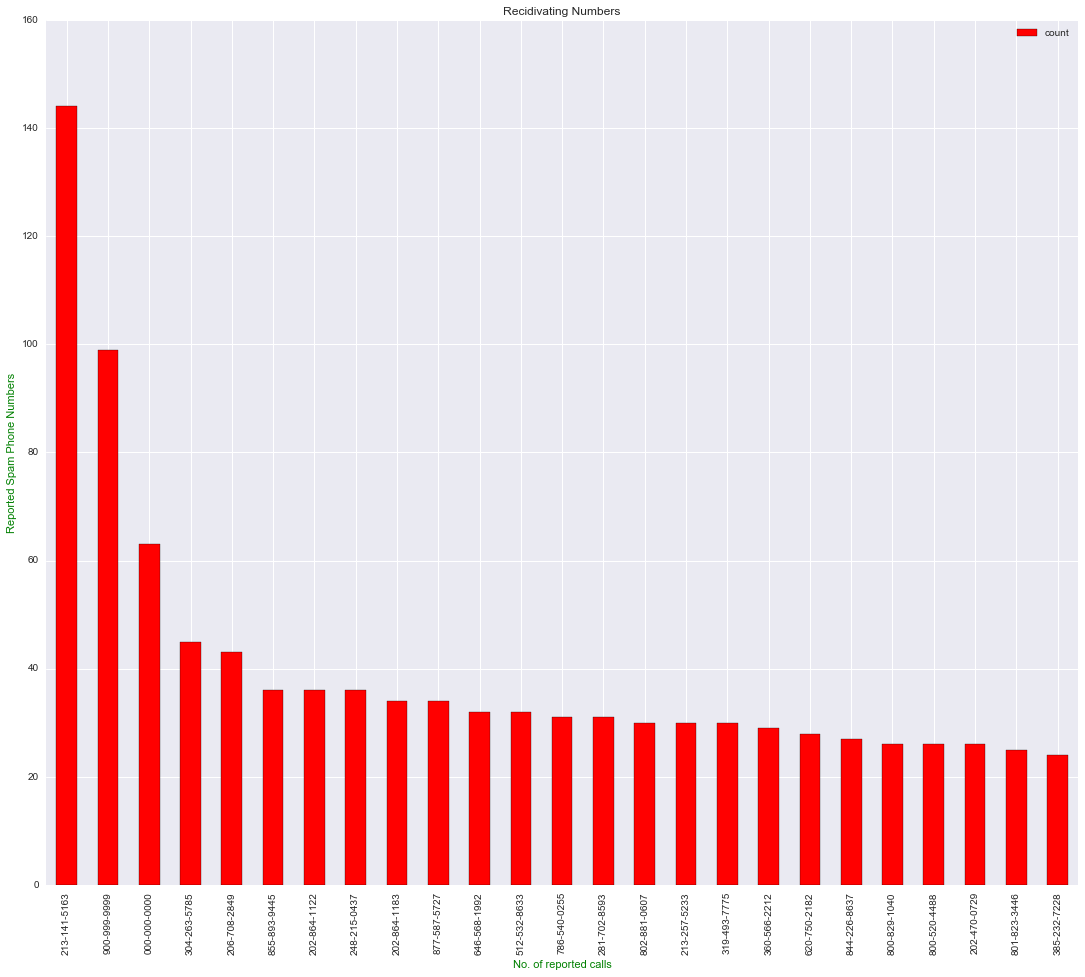

In [25]:
import pylab

plot = reci.plot.bar(x='number',color='r',title='Recidivating Numbers')
fig = plot.get_figure()
plot.set_xlabel('No. of reported calls',color='G')
plot.set_ylabel('Reported Spam Phone Numbers', color='G')
fig.set_size_inches(18.5, 15.5)

In [27]:
fcc4 = fcc1['Method'].value_counts()

In [28]:
fcc4 = fcc4.to_frame()

In [29]:
fcc4 = fcc4.reset_index() 

In [30]:
fcc4.columns = ['method','count']

In [31]:
fcc4

,method,count
0,Wireless (cell phone/other mobile device),237040
1,Wired,148878
2,Cable,98600
3,Wireless,35517
4,Internet (VOIP),34710
5,DSL,19405
6,Broadcast,19368
7,Satellite,13808
8,Fiber,11753
9,Amateur Radio,1412


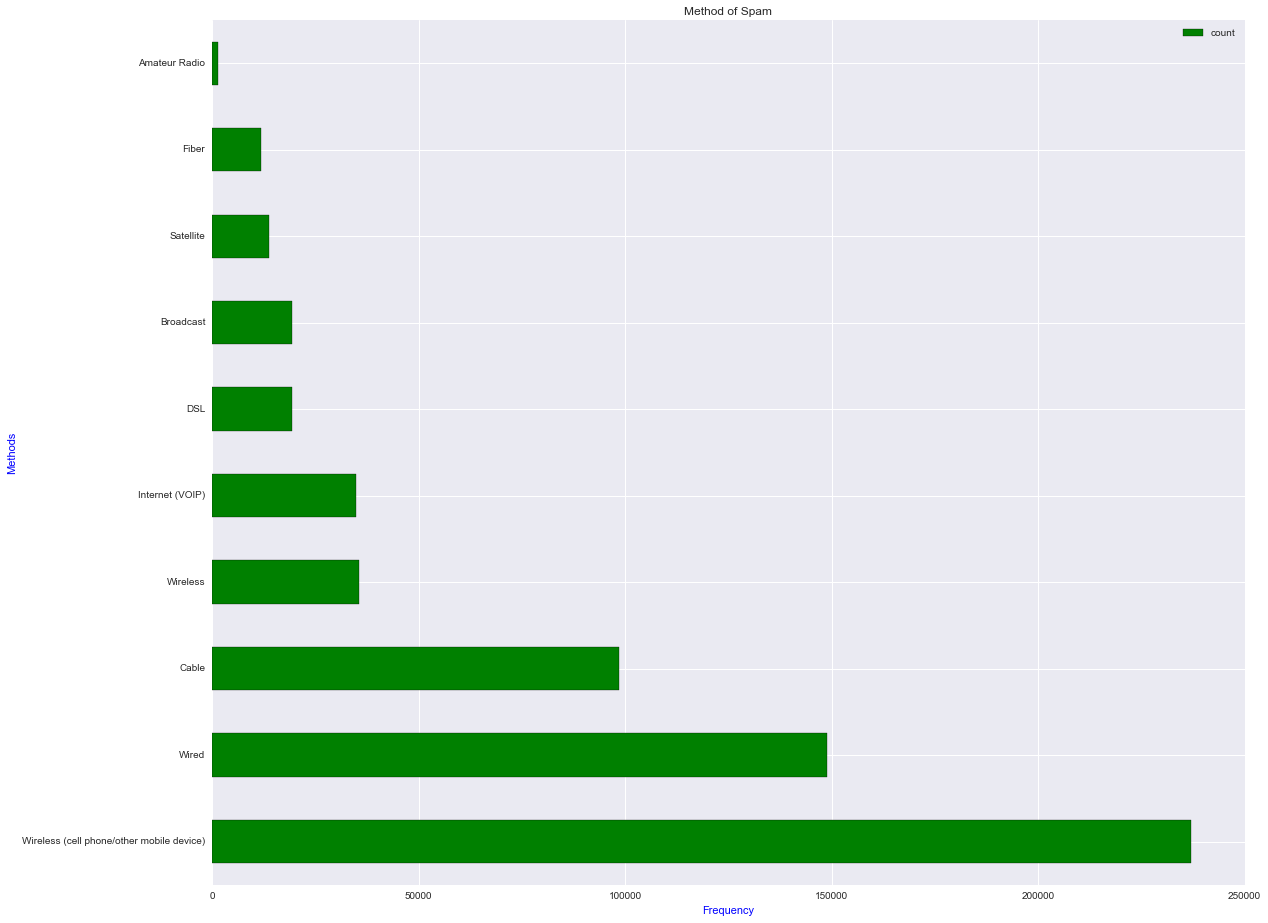

In [33]:
plot = fcc4.plot.barh('method',color='G',title='Method of Spam')
fig = plot.get_figure()
plot.set_xlabel('Frequency',color='B')
plot.set_ylabel('Methods', color='B')
fig.set_size_inches(18.5, 15.5)